# Importation 

In [1]:

import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import matplotlib
from matplotlib import pyplot as plt
import codecs
%matplotlib inline

C:\Users\Dell 7470\Anaconda1\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\Dell 7470\Anaconda1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Clean data

In [7]:
# Data 
path='C:/Users/Dell 7470/Desktop/pfa/projet/data/sports.csv'
data = pd.read_csv(path, encoding='utf-8',error_bad_lines=False, sep=';', header=None)

# Missing value 
N=len(data)
B=[]
dic={'law, govt and politics': '1', 'health and fitness': '1', 'society': '1', 'science': '1', 'art and entertainment': '1', 'news': '1', 'religion and spirituality': '1', 'finance': '1', 'sports': '1', 'business and industrial': '1', 'technology and computing': '1', 'family and parenting': '1', 'education': '1', 'automotive and vehicles': '1', 'careers': '1', 'hobbies and interests': '1', 'travel': '1', 'real estate': '1', 'food and drink': '1', 'style and fashion': '1', 'pets': '1', 'shopping': '1', 'home and garden': '1', ' doc': '1'}


for domaine in data[1][1:] :
    if len(str(domaine).split(" "))<6:
        dic[domaine]="1"

for i in range(N):
    if data[1][i] in dic.keys():
        if str(data[1][i]) != "nan":
            B.append([data[0][i],data[1][i]])
#print(B[:40])
def writterCsv(B,pathoutput):
    with codecs.open(str(pathoutput),"w+", encoding="utf8") as f:
         for liste in B:
            f.write('{0};{1}\n'.format(liste[0],liste[1]))
            
            
# Saving data             
writterCsv(B,"C:/Users/Dell 7470/Desktop/pfa/projet/data/data_avant.csv")

# visualisation

In [7]:
df = pd.read_csv("C:/Users/Dell 7470/Desktop/stage pfe/1 idee/data_avant.csv",encoding='utf-8',error_bad_lines=False, sep=';', header=None)
df = df[pd.notnull(df[1])]
print(df.head(2))

                                                   0                       1
0  Je dÃ©clare reprise la session du Parlement eu...  law, govt and politics
1   Comme vous avez pu le constater, le grand "bo...      health and fitness


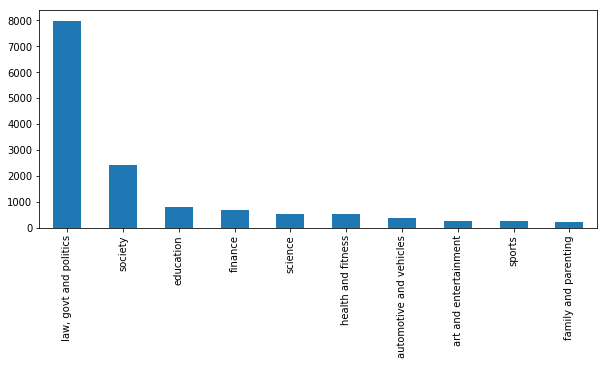

In [8]:
plt.figure(figsize=(10,4))
df[1].value_counts().plot(kind='bar');

  - Balancing data by adding more observations 

In [3]:
df2 = pd.read_csv("C:/Users/Dell 7470/Desktop/projet/data/data.csv",encoding='utf-8',error_bad_lines=False, sep=';', header=None)
df2 = df2[pd.notnull(df2[1])]
df2.head(10)

,0,1
0,Le sport est dépassement de soi. Le sport est ...,sports
1,Le football est le reflet de notre société. Re...,sports
2,Le sport est une évasion complète de la vie.,sports
3,"Le karaté c'est comme la vie, un art des renco...",sports
4,Je voudrais évoquer quelques points spécifiques,sports
5,"Le sport va chercher la peur pour la dominer, ...",sports
6,Le sport est dépassement de soi. Le sport est ...,sports
7,Pour important que soit le principe de concur...,sports
8,"Pratiqué avec sérieux, le sport n'a rien à voi...",sports
9,Quelles garanties avons-nous qu ils évoluero...,sports


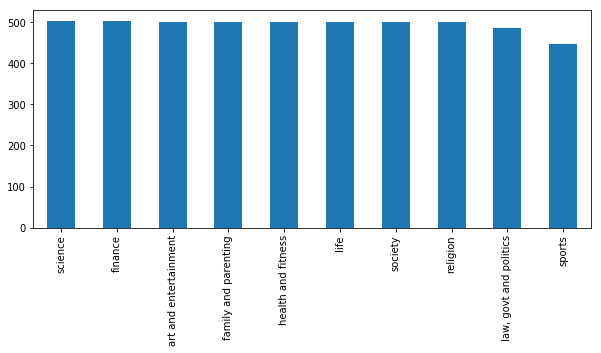

In [4]:
plt.figure(figsize=(10,4))
df2[1].value_counts().plot(kind='bar');

# pre preocessing 

In [6]:
#extrait of the data
def print_plot(index):
    example = df2[df2.index == index][[0, 1]].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

 J estime que le rapporteur joue simplement avec les chiffres 
Tag: sports


In [7]:
print_plot(60)

Les hommes pratiquent le stress comme si c'était un sport.
Tag: sports


In [8]:
def  r_punctuation(text):
    """ Return a cleaned version of text
    """
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

df2[0] = df2[0].apply(r_punctuation)
df2.head(10)

,0,1
0,le sport est dépassement de soi le sport est é...,sports
1,le football est le reflet de notre société reg...,sports
2,le sport est une évasion complète de la vie,sports
3,le karaté c est comme la vie un art des rencon...,sports
4,je voudrais évoquer quelques points spécifiqu...,sports
5,le sport va chercher la peur pour la dominer l...,sports
6,le sport est dépassement de soi le sport est é...,sports
7,pour important que soit le principe de concur...,sports
8,pratiqué avec sérieux le sport n a rien à voir...,sports
9,quelles garanties avons nous qu ils évolueron...,sports


In [9]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
sw = stopwords.words('French') #pour le text en francais 
print(np.array(sw))
print(len(np.array(sw)))

['au' 'aux' 'avec' 'ce' 'ces' 'dans' 'de' 'des' 'du' 'elle' 'en' 'et'
 'eux' 'il' 'je' 'la' 'le' 'leur' 'lui' 'ma' 'mais' 'me' 'même' 'mes'
 'moi' 'mon' 'ne' 'nos' 'notre' 'nous' 'on' 'ou' 'par' 'pas' 'pour' 'qu'
 'que' 'qui' 'sa' 'se' 'ses' 'son' 'sur' 'ta' 'te' 'tes' 'toi' 'ton' 'tu'
 'un' 'une' 'vos' 'votre' 'vous' 'c' 'd' 'j' 'l' 'à' 'm' 'n' 's' 't' 'y'
 'été' 'étée' 'étées' 'étés' 'étant' 'étante' 'étants' 'étantes' 'suis'
 'es' 'est' 'sommes' 'êtes' 'sont' 'serai' 'seras' 'sera' 'serons' 'serez'
 'seront' 'serais' 'serait' 'serions' 'seriez' 'seraient' 'étais' 'était'
 'étions' 'étiez' 'étaient' 'fus' 'fut' 'fûmes' 'fûtes' 'furent' 'sois'
 'soit' 'soyons' 'soyez' 'soient' 'fusse' 'fusses' 'fût' 'fussions'
 'fussiez' 'fussent' 'ayant' 'ayante' 'ayantes' 'ayants' 'eu' 'eue' 'eues'
 'eus' 'ai' 'as' 'avons' 'avez' 'ont' 'aurai' 'auras' 'aura' 'aurons'
 'aurez' 'auront' 'aurais' 'aurait' 'aurions' 'auriez' 'auraient' 'avais'
 'avait' 'avions' 'aviez' 'avaient' 'eut' 'eûmes' 'eûtes' 'e

In [10]:
#sw = stopwords.words('english')
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)
df2[0] = df2[0].apply(stopwords)
df2.head(10)

,0,1
0,sport dépassement soi sport école vie,sports
1,football reflet société regardez bien expressi...,sports
2,sport évasion complète vie,sports
3,karaté comme vie art rencontres surtout art re...,sports
4,voudrais évoquer quelques points spécifiques,sports
5,sport va chercher peur dominer fatigue triomph...,sports
6,sport dépassement soi sport école vie,sports
7,important principe concurrence concurrence pou...,sports
8,pratiqué sérieux sport a rien voir fair play d...,sports
9,quelles garanties ils évolueront maniéredeveni...,sports


In [11]:
df2[0].apply(lambda x: len(x.split(' '))).sum()

68164

In [12]:
df2 = df2.reindex(np.random.permutation(df2.index))

# Model keras

- model with simple tokenization 

In [14]:
#import biblio for our model 
import itertools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 1.13.1


- Splitting Data

In [21]:
(train_posts, test_posts, train_tags, test_tags) = train_test_split(df2[0], df2[1], test_size=0.25,shuffle=True)

- Tokenization 

In [22]:
max_words = 7000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [23]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)
x_train 

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
len(x_train)

3703

  -- Saving our Tokenization 

In [52]:
import pickle
import os

pickle.dump(tokenize, open(os.path.join("C:/Users/Dell 7470/Desktop/projet/pickl_model", 'tokenize.pickle'), 'wb'), protocol=4)

In [25]:
# Use sklearn utility to convert label strings to numbered index

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)
y_test

array([5, 0, 2, ..., 6, 0, 9])

In [26]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [27]:
print(num_classes)

10


In [28]:
def getMaxLenComment():
    listMax=[]
    for index, row in df2.iterrows():
        for c in row:
            listMax.append(len(c.split()))
    return max(listMax)
print(getMaxLenComment())

405


# Creation of our  Model 

In [29]:
batch_size=8
epochs=10
max_words=7000

In [ ]:
model = Sequential()
model.add(Dense(592, input_shape=(1000,)))
model.add(Dense(278, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(270, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(270, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

- Training 

In [31]:
history = model.fit(x_train,  y_train,validation_split=0.1,batch_size=batch_size,epochs=epochs,verbose=1)

Train on 3332 samples, validate on 371 samples
Epoch 1/10
3332/3332 [==============================] - 22s 6ms/step - loss: 1.1282 - acc: 0.6564 - val_loss: 0.4863 - val_acc: 0.8787
Epoch 2/10
3332/3332 [==============================] - 19s 6ms/step - loss: 0.3792 - acc: 0.9202 - val_loss: 0.5512 - val_acc: 0.8868
Epoch 3/10
3332/3332 [==============================] - 19s 6ms/step - loss: 0.2653 - acc: 0.9544 - val_loss: 0.5726 - val_acc: 0.8814
Epoch 4/10
3332/3332 [==============================] - 19s 6ms/step - loss: 0.1829 - acc: 0.9706 - val_loss: 0.5874 - val_acc: 0.9003
Epoch 5/10
3332/3332 [==============================] - 18s 6ms/step - loss: 0.1669 - acc: 0.9730 - val_loss: 0.7396 - val_acc: 0.8706
Epoch 6/10
3332/3332 [==============================] - 19s 6ms/step - loss: 0.1359 - acc: 0.9730 - val_loss: 0.7496 - val_acc: 0.8652
Epoch 7/10
3332/3332 [==============================] - 19s 6ms/step - loss: 0.1194 - acc: 0.9772 - val_loss: 0.6788 - val_acc: 0.8814
Epoch 8/

- Evaluation 

In [32]:
acc = model.evaluate(x_test,y_test)[1]

1235/1235 [==============================] - 0s 331us/step


In [33]:
acc

0.8226720648738537

# plot 

In [34]:
import matplotlib.pyplot as plt
## Fit the model
def plotTrain(history):
    plt.figure(1)
    plt.plot(list(range(epochs)),history.history['acc'])
    plt.plot(list(range(epochs)),np.asarray(history.history['val_acc']))
    plt.title('model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train','test'], loc='upper left')

1235/1235 [==============================] - 0s 317us/step
acc: 82.3%


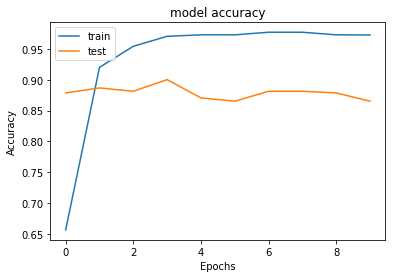

In [35]:
plotTrain(history)
acc = model.evaluate(x_test,y_test)[1]
print('{}: {:.3}%'.format(model.metrics_names[1],acc*100))

In [35]:
score = model.evaluate(x_test, y_test,batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])


6798/6798 [==============================] - 2s 300us/step
Test score: 2.262081272744473
Test accuracy: 0.47646366578405414


# Saving model 

In [40]:
import pickle
import os

pickle.dump(model, open(os.path.join("C:/Users/Dell 7470/Desktop/projet/pickl_model", 'keras.pickle'), 'wb'), protocol=4)